In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder       
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix          
from sklearn.tree import DecisionTreeClassifier      
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC   


from xgboost import XGBClassifier 

from collections import Counter 


import joblib    

In [31]:
cc = pd.read_csv('Telco_Customer_Churn.csv')

In [32]:
# Check for missing values
cc.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
# Data information
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
cc['customerID'].duplicated().sum()

np.int64(0)

In [35]:
cc.loc[cc['tenure']==0, ['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


In [36]:
# Changing the data type of the column 'Total Charges' from OBJECT to FLOAT
cc['TotalCharges'] = pd.to_numeric(cc['TotalCharges'], errors='coerce')

In [37]:
cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [38]:
cc.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
cc.loc[cc['tenure']==0, ['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [40]:
## Filling missing values for total chages
cc.loc[cc['tenure'].notna() & cc['MonthlyCharges'].notna() & cc['TotalCharges'].isna(), 'TotalCharges'] = cc['tenure'] * cc['MonthlyCharges']

In [41]:
cc.rename(columns={'customerID': 'CustomerID', 'tenure': 'Tenure', 'gender': 'Gender'}, inplace=True)

In [42]:
cc.loc[cc['Tenure']==0, ['Tenure','MonthlyCharges','TotalCharges']]

,Tenure,MonthlyCharges,TotalCharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0
3331,0,19.85,0.0
3826,0,25.35,0.0
4380,0,20.00,0.0
5218,0,19.70,0.0
6670,0,73.35,0.0


In [43]:
cc.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [44]:
cc.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
# Exporting the dataframe to .csv format
cc.to_csv('Group_2_Project_Cleaned_Dataset.csv',index = False)

In [46]:
## Dropping the CustomerID column since it is not relevant for the modelling
cc = cc.drop(columns = ['CustomerID'])

In [47]:
#### Using list comprehension for the above - categorical features 
cat_feat = [item for item in cc.columns if cc[item].dtype == 'object' or cc[item].nunique()<10]

#### Using list comprehension for the above - numeric/continuous features
num_feat = [item for item in cc.columns if item not in cat_feat]

In [48]:
cat_feat

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [49]:
cc[num_feat].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


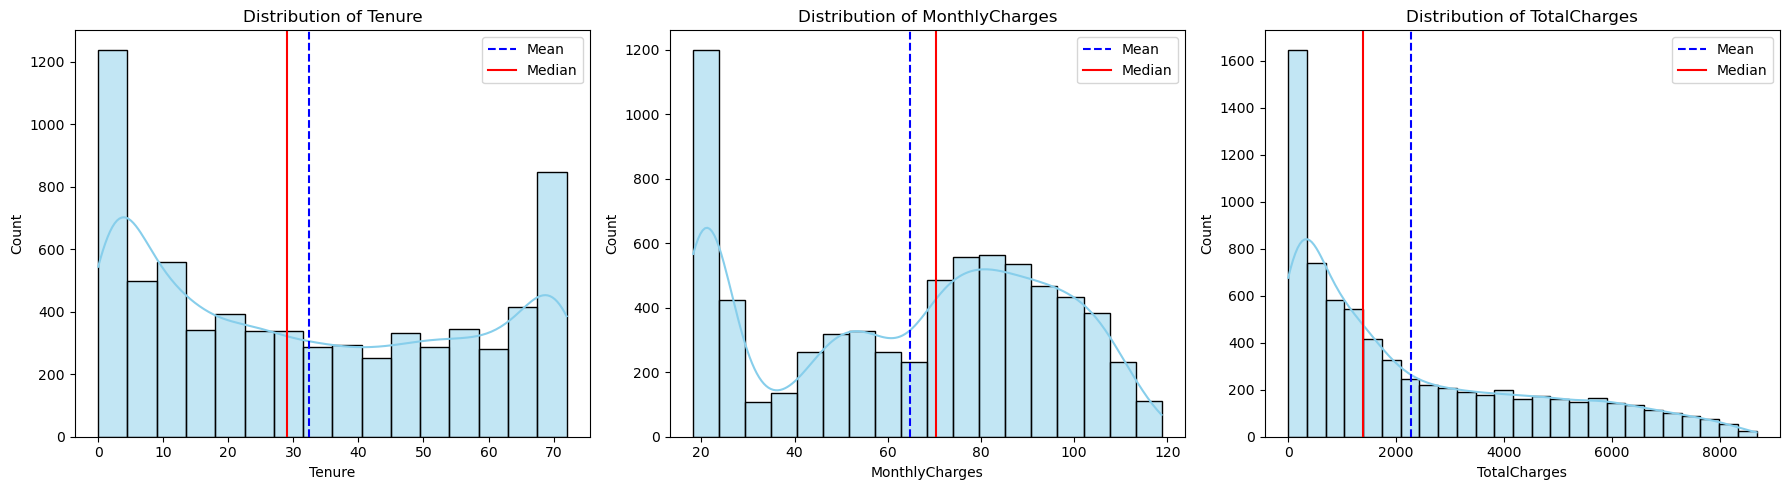

In [50]:
# Checking for distribution in the numerical columns:
fig, axes = plt.subplots(1, len(num_feat), figsize=(18, 5))

for i, column in enumerate(num_feat):
    sns.histplot(cc[column], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    
    # Calculate mean and median
    col_mean = cc[column].mean()
    col_median = cc[column].median()
    
    # Add vertical lines for mean and median
    axes[i].axvline(col_mean, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(col_median, color='red', linestyle='-', label='Median')
    
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.tight_layout()
plt.show()

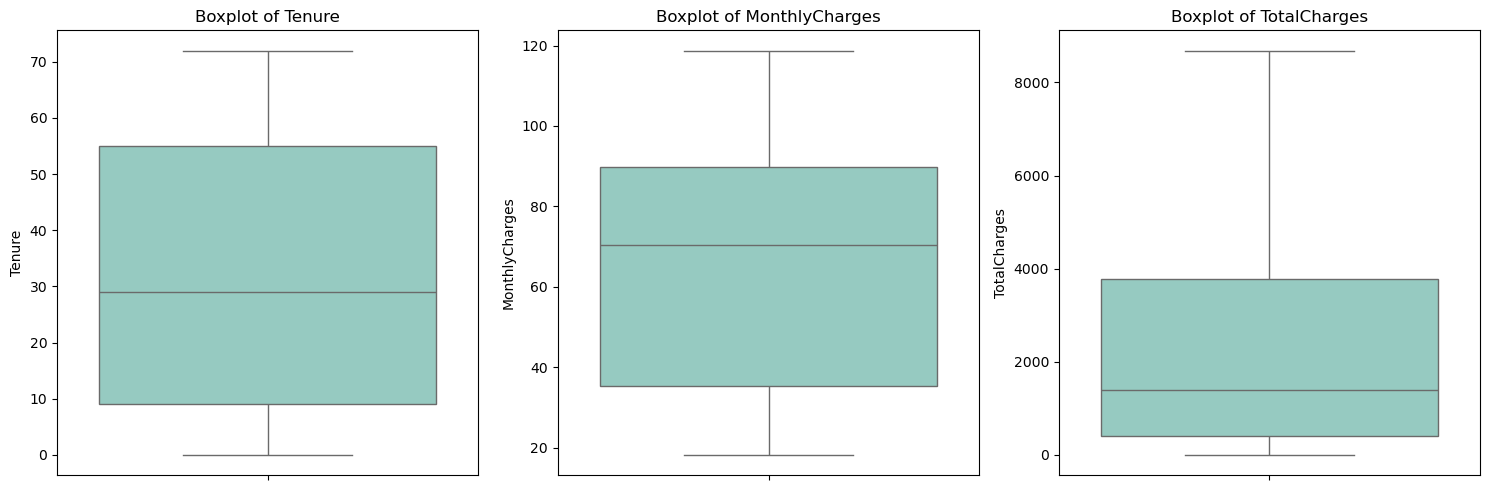

In [51]:
# Identify outliers by using boxplot for the numeric features 
fig, axes = plt.subplots(1, len(num_feat), figsize=(15, 5))

for index, column in enumerate(num_feat):
    sns.boxplot(y=cc[column], ax=axes[index], palette="Set3")
    axes[index].set_title(f'Boxplot of {column}', fontsize=12)
    axes[index].set_ylabel(column)


plt.tight_layout()
plt.show()

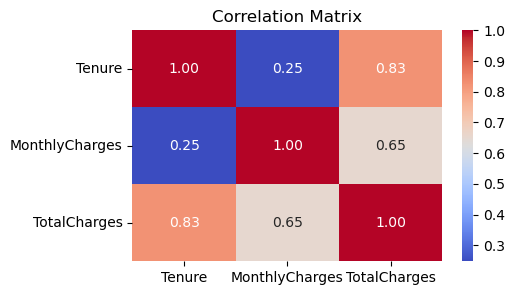

In [52]:
### Correlation of numeric features
plt.figure(figsize=(5,3))
sns.heatmap(cc[num_feat].corr(), annot = True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

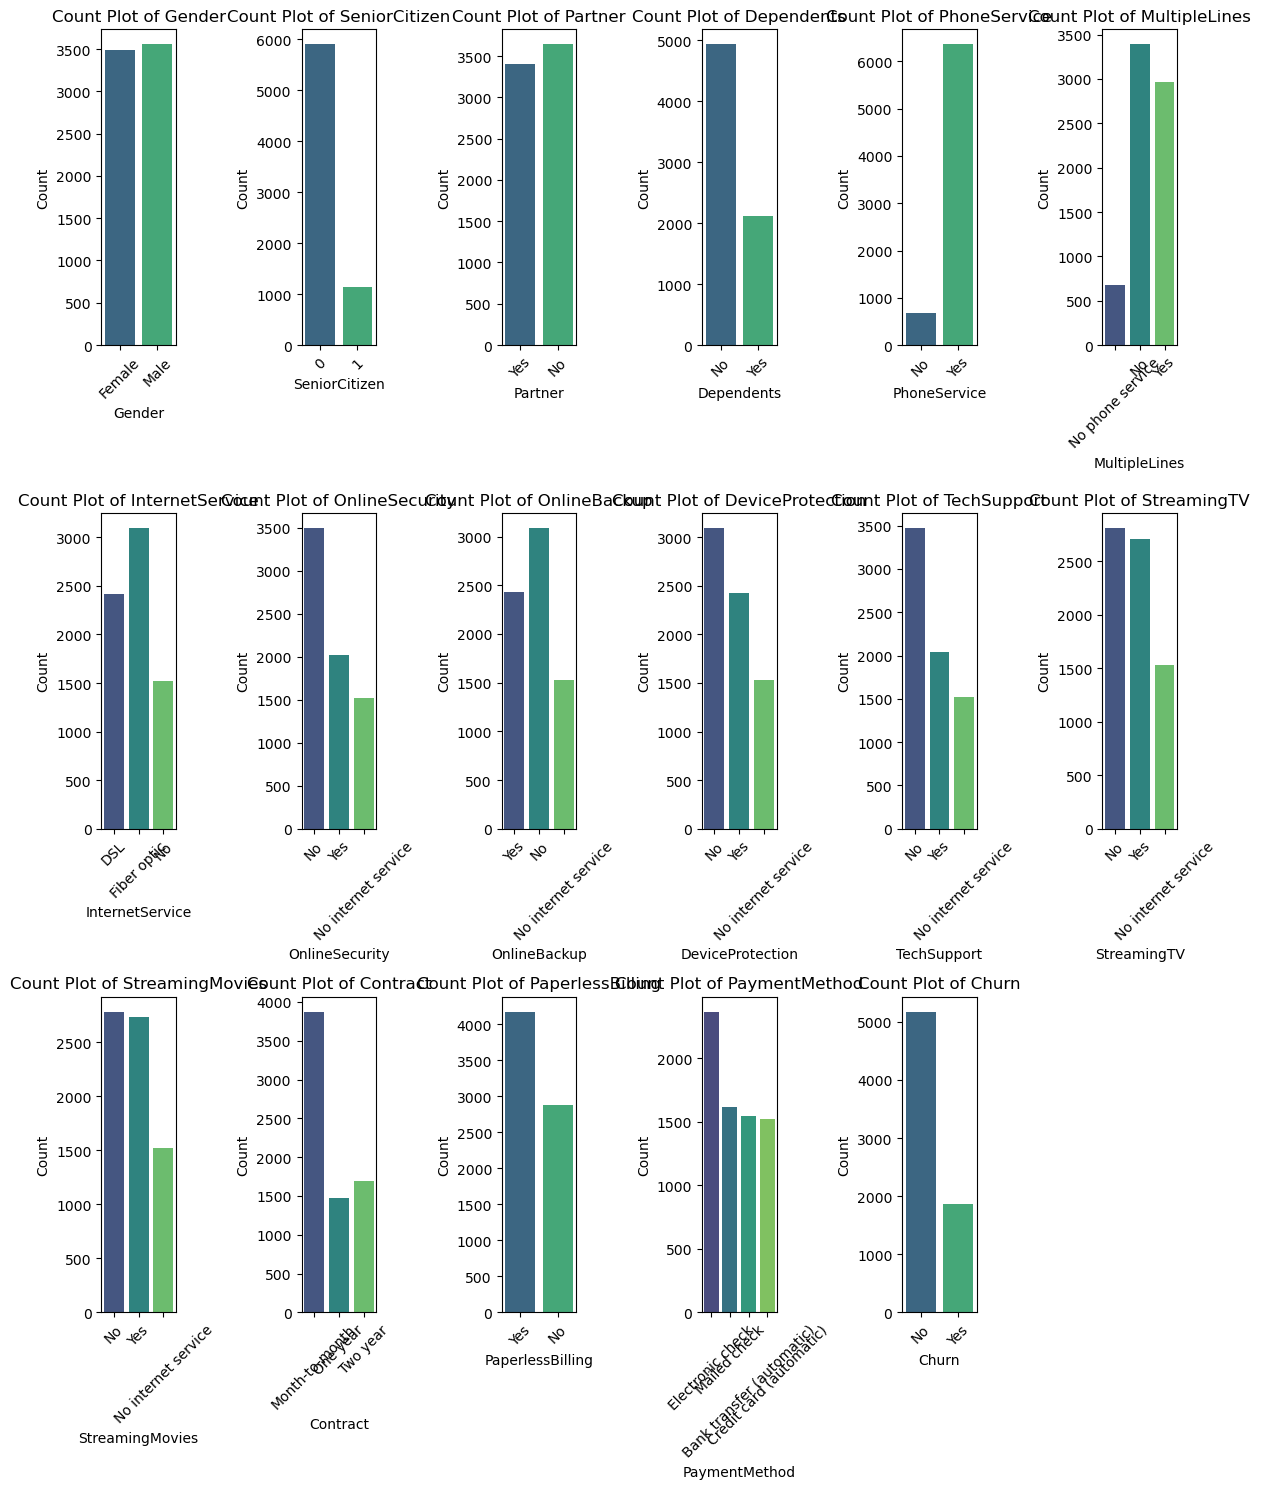

In [53]:
# # Countplot for cat_feat (EDA)
# for column in cat_feat:
#     plt.figure(figsize=(5,3))
#     sns.countplot(x = cc[column])
#     plt.title(f'Count plot of {column}')
    
#     plt.show()

import math


# Set number of columns for subplot grid
n_cols = 6
n_rows = math.ceil(len(cat_feat) / n_cols)

# Set figure size
plt.figure(figsize=(12, 5 * n_rows))

# Loop through categorical features
for i, column in enumerate(cat_feat, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=cc, x=column, palette='viridis')
    plt.xticks(rotation = 20)
    # plt.yticks([])
    # for container in ax.containers:
    #     ax.bar_label(container, label_type = 'edge', fontsize = 12, labels = [f'{bar.get_height():,.0f}' for bar in container])
    plt.title(f'Count Plot of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [54]:

cat_feat

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [55]:
num_feat

['Tenure', 'MonthlyCharges', 'TotalCharges']

In [56]:
cc.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
le = LabelEncoder()
cc['Gender'] = le.fit_transform(cc['Gender'])
cc['Churn'] = le.fit_transform(cc['Churn'])
y = cc['Churn']
cc['Partner'] = le.fit_transform(cc['Partner'])
cc['Dependents'] = le.fit_transform(cc['Dependents'])
cc['PhoneService'] = le.fit_transform(cc['PhoneService'])
cc['OnlineSecurity'] = le.fit_transform(cc['OnlineSecurity'])
cc['OnlineBackup'] = le.fit_transform(cc['OnlineBackup'])
cc['DeviceProtection'] = le.fit_transform(cc['DeviceProtection'])
cc['TechSupport'] = le.fit_transform(cc['TechSupport'])
cc['StreamingTV'] = le.fit_transform(cc['StreamingTV'])
cc['StreamingMovies'] = le.fit_transform(cc['StreamingMovies'])
cc['PaperlessBilling'] = le.fit_transform(cc['PaperlessBilling'])
cc['MultipleLines'] = le.fit_transform(cc['MultipleLines'])
cc['InternetService'] = le.fit_transform(cc['InternetService'])
cc['Contract'] = le.fit_transform(cc['Contract'])
cc['PaymentMethod'] = le.fit_transform(cc['PaymentMethod'])

In [62]:
cc.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:
cc_encoded = cc.copy()

In [64]:
# Define features (X) and target (y)
X = cc_encoded.drop("Churn", axis=1)  #features
y = cc_encoded["Churn"]

In [65]:
X.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [66]:
#### Splitting the dataset for training and testing 

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [67]:
X_train.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [68]:
### Initializing the standard scaler
scaler = StandardScaler()

In [69]:
#### standardizing the numeric features
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])
X_test[num_feat] = scaler.transform(X_test[num_feat]) 

In [70]:
cc_encoded['Churn'].unique()

array([0, 1])

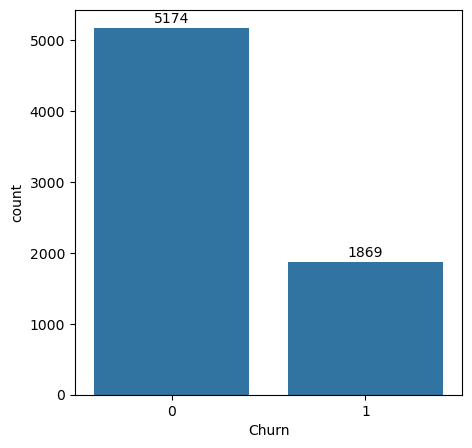

In [71]:
#### Check distribution using count plot 
plt.figure(figsize=(5,5))
ax = sns.countplot(x=y)  # where y = bc['Attrition_Flag']
for item in ax.containers:
    ax.bar_label(item, fmt = '%d', padding = 2)
plt.show()

In [72]:
print(Counter(y_train))

Counter({0: 4138, 1: 1496})


In [73]:
### Initialize SMOTE
smote = SMOTE()

### Using SMOTE to resample our train dataset  
X_train, y_train = smote.fit_resample(X_train,y_train)

In [74]:
print(Counter(y_train))

Counter({0: 4138, 1: 4138})


In [75]:
# Initializing  the decision tree
mod_dt = DecisionTreeClassifier(random_state = 42)

### Training the model/machine 
mod_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
#### Testing the model for prediction
y_pred_dt = mod_dt.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1036
           1       0.47      0.56      0.51       373

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.73      0.72      0.72      1409



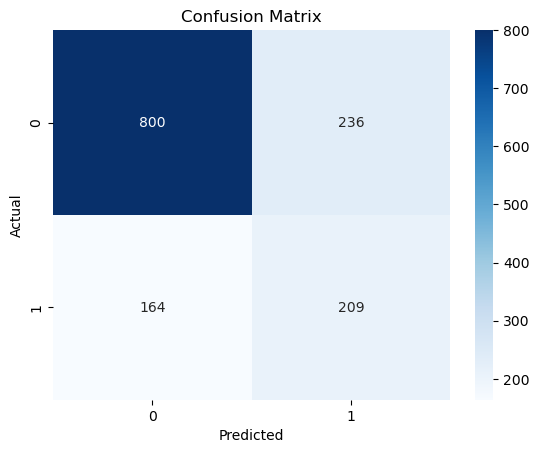

In [78]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot = True, cmap = 'Blues', fmt = 'd') # d means format to 0 decimalplaces
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
#### RANDOM FOREST CLASSIFIER

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
### Initialize the random forest 
mod_rf = RandomForestClassifier(random_state = 42)

### Train model 
mod_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Test the model 
y_pred_rf = mod_rf.predict(X_test)

In [83]:
X_train.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [84]:
#### EVALUATING THE RANDOM FOREST
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.79      1409



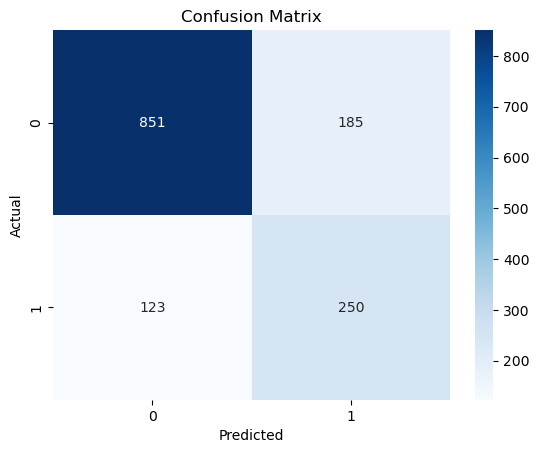

In [85]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [123]:
## XGBOOST CLASSIFIER
mod_xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, random_state = 42, n_estimators = 100)

In [124]:
### Train the model 
mod_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [125]:
### Predict with the model 
y_pred_xgb = mod_xgb.predict(X_test)

In [126]:
### Classification Report 
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



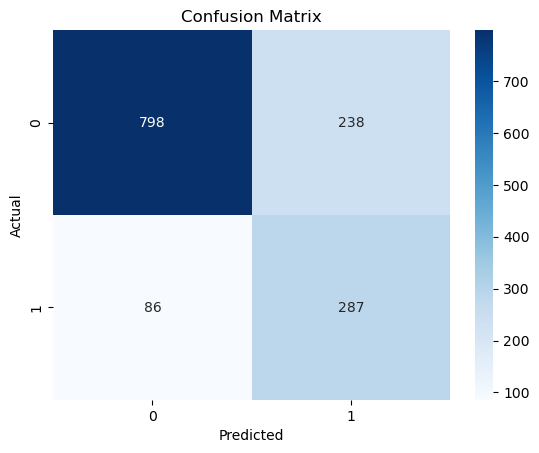

In [127]:
### Confusion Matrix 
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [212]:
#### SUPPORT VECTOR CLASSIFIER
### Initialize the Support Vector Classifier (svc)
mod_svc = SVC(random_state = 42)

In [213]:
### ModelTraining
mod_svc.fit(X_train, y_train)

SVC(random_state=42)

In [214]:
### Predict with the model
y_pred_svc = mod_svc.predict(X_test)

In [215]:
### Model Evaluation
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



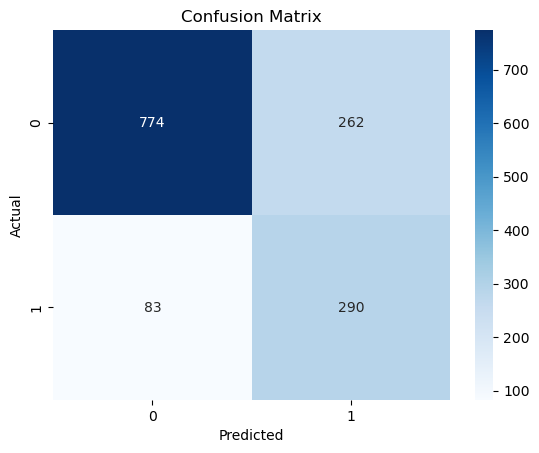

In [216]:
#### Confusion Matrix Visualization
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [217]:
###Initialize the logistic regression 
mod_log = LogisticRegression(random_state = 42)

In [218]:
mod_log.fit(X_train, y_train)  

LogisticRegression(random_state=42)

In [219]:
# Predicting the target variable (bc['Attrition_Flag'])
y_pred = mod_log.predict(X_test)  # Use X_test to predict our target variable,y

In [220]:
# Evaluation of model performance 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



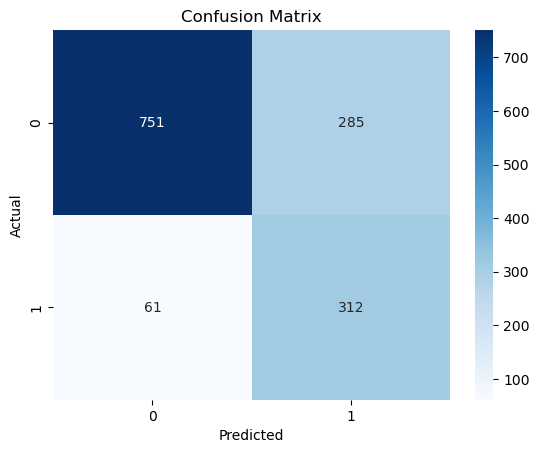

In [221]:
cm_log = confusion_matrix(y_test,y_pred)         # confusion matrix tells us how many the method predicted right and wrong
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [128]:
joblib.dump(mod_rf, 'Telco_Churn_Model.pkl')

['Telco_Churn_Model.pkl']

In [224]:
# Creating random values to be used for the n_estimators & max_depth
q = [int(i) for i in np.linspace(100,500,50)]

r = [int(j) for j in np.linspace(5, 50, 10)]


In [225]:
# RandomizedSearcgCV grid parameters
param_grid = { 'n_estimators': q, 
              'max_depth': r,
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4], 
              'criterion': ['gini', 'entropy']
             }

In [231]:
mod_ransearch = RandomizedSearchCV(
    estimator = mod_rf, 
    param_distributions = param_grid,
    n_iter = 200, cv = 3, 
    verbose = 2, 
    n_jobs = -1,
    random_state = 42
)

In [232]:
# Fitting the model
mod_ransearch.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 108, 116, 124,
                                                         132, 140, 148, 157,
                                                         165, 173, 181, 189,
                                                         197, 206, 214, 222,
                                                         230, 238, 246, 255,
                                                         263, 271, 279, 287,
                                                         295, 304, 312, 320,
                                                         328, 336, ...]},
                   random_state=42, verbose=2)

In [233]:
# Best model
random_best_model = mod_ransearch.best_estimator_

# Predict on test data
y_pred = random_best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy on Test Data: {accuracy:.2f}")
print("\nBest Parameters:", mod_ransearch.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy on Test Data: 0.77

Best Parameters: {'n_estimators': 181, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.66      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



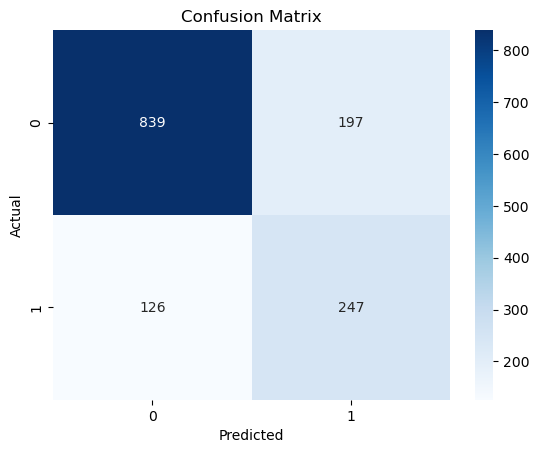

In [248]:
cm_ransearch = confusion_matrix(y_test,y_pred)         # confusion matrix 
sns.heatmap(mod_ransearch, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [235]:
# Focused parameter grid
param_grid = {
    'n_estimators': [170, 180, 181, 190],
    'max_depth': [0, 30, 35, 38, 40],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

In [236]:
mod_gridsearch = GridSearchCV(
    estimator= mod_rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [237]:
mod_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 30, 35, 38, 40],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [170, 180, 181, 190]},
             scoring='accuracy', verbose=2)

In [238]:
# Best model
best_grid_model = mod_gridsearch.best_estimator_

# Evaluate
y_pred = best_grid_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🔥 Improved Model Accuracy: {accuracy:.4f}")
print("\n🏆 Best Parameters from GridSearchCV:")
print(mod_gridsearch.best_params_)

print("\n📈 Classification Report:\n")
print(classification_report(y_test, y_pred))


🔥 Improved Model Accuracy: 0.7708

🏆 Best Parameters from GridSearchCV:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 181}

📈 Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.66      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [249]:
joblib.dump(mod_ransearch, 'Telecom_Churn_Model.pkl')

['Telecom_Churn_Model.pkl']

In [1]:
X_train.column

NameError: name 'X_train' is not defined